In [3]:
import torch
from torch import nn
from torch.utils import data
import numpy as np
import tqdm
import pandas as pd

In [18]:
train = pd.read_csv('OpenBG500_train.tsv', sep = '\t', header = None, names = ['head', 'relation', 'tail'])
dev = pd.read_csv('OpenBG500_dev.tsv', sep = '\t', header = None, names = ['head', 'relation', 'tail'])
test = pd.read_csv('OpenBG500_test.tsv', sep = '\t', header = None, names = ['head', 'relation'])
entity2text = pd.read_csv('OpenBG500_entity2text.tsv', sep = '\t', header = None, names = ['entity', 'text'])
relation2text = pd.read_csv('OpenBG500_relation2text.tsv', sep = '\t',header = None, names = ['relation', 'text'])

In [24]:
train.sort_values(by='head')

,head,relation,tail
736416,ent_000005,rel_0293,ent_160576
305090,ent_000005,rel_0271,ent_151874
31258,ent_000005,rel_0160,ent_109153
383626,ent_000006,rel_0432,ent_035440
188015,ent_000006,rel_0370,ent_179691
...,...,...,...
157464,ent_249742,rel_0290,ent_019705
773201,ent_249742,rel_0290,ent_238638
1182901,ent_249742,rel_0426,ent_011309
780661,ent_249742,rel_0290,ent_128529


In [27]:
train.sort_values(by='tail')

,head,relation,tail
78646,ent_139952,rel_0418,ent_000000
389307,ent_069498,rel_0418,ent_000001
576120,ent_226582,rel_0418,ent_000002
1169355,ent_227456,rel_0418,ent_000002
164318,ent_143580,rel_0418,ent_000003
...,...,...,...
897322,ent_193552,rel_0418,ent_249743
788979,ent_188164,rel_0418,ent_249744
267091,ent_145663,rel_0418,ent_249744
733691,ent_174288,rel_0418,ent_249744


In [25]:
dev.sort_values(by='head')

,head,relation,tail
1429,ent_000130,rel_0246,ent_069916
4740,ent_000190,rel_0209,ent_066865
4035,ent_000294,rel_0063,ent_205965
4172,ent_000335,rel_0428,ent_224472
3123,ent_000520,rel_0256,ent_019762
...,...,...,...
1046,ent_249637,rel_0200,ent_102161
68,ent_249650,rel_0370,ent_095966
4716,ent_249726,rel_0332,ent_109153
354,ent_249738,rel_0228,ent_106817


In [26]:
test.sort_values(by='head')

,head,relation
4546,ent_000006,rel_0287
1993,ent_000173,rel_0180
3635,ent_000238,rel_0213
1613,ent_000240,rel_0169
2858,ent_000285,rel_0352
...,...,...
4715,ent_249581,rel_0351
3272,ent_249637,rel_0189
881,ent_249673,rel_0390
3579,ent_249676,rel_0410


In [28]:
entity2text.sort_values(by='entity')

,entity,text
47220,ent_000000,魔方周边
46810,ent_000001,美式
192589,ent_000002,森林
155385,ent_000003,温儒敏
60053,ent_000004,湖南香辣
...,...,...
51723,ent_249741,青春
103520,ent_249742,包邮故宫文具上上吉语铅2B HB铅笔套装学生学习用笔商务书写创意伴手礼品生日礼物奖品
158716,ent_249743,黄色
220278,ent_249744,短衣短裤


3      52896
2      44544
4      42910
5      20050
6      14173
       ...  
76         2
77         1
74         1
158        1
150        1
Name: text, Length: 79, dtype: int64


<AxesSubplot:ylabel='text'>

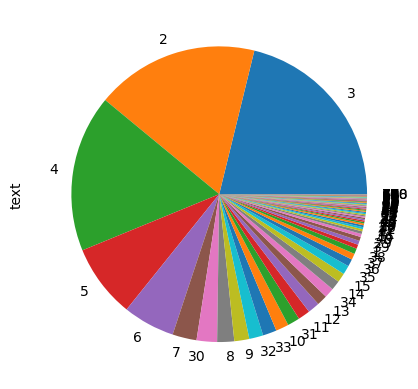

In [47]:
e2t_len=entity2text['text'].str.len()
e2t_len_count=e2t_len.value_counts()
print(e2t_len_count)
e2t_len_count.plot(kind='pie')

In [29]:
relation2text.sort_values(by='relation')

,relation,text
478,rel_0000,刷头材质
479,rel_0001,倍率类型
196,rel_0002,魔方种类
350,rel_0003,生产厂家
248,rel_0004,演出赛事时间
...,...,...
108,rel_0495,适用地区
261,rel_0496,内桶材质
442,rel_0497,玻璃杯花色
295,rel_0498,毛色


4     313
2      84
3      38
5      27
6      27
7       8
8       2
10      1
Name: text, dtype: int64


<AxesSubplot:>

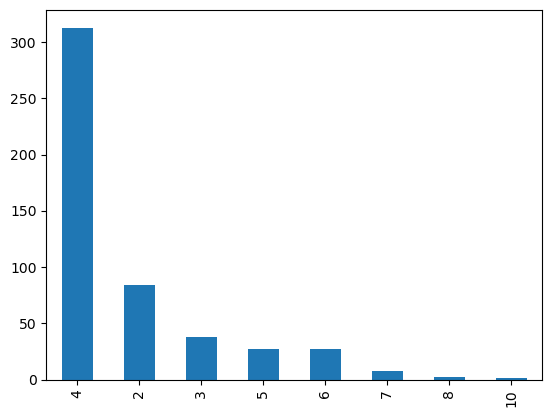

In [49]:
r2t_len=relation2text['text'].str.len()
r2t_len_count=r2t_len.value_counts()
print(r2t_len_count)
r2t_len_count.plot(kind='bar')